# WK 13 Homework
## Nathan J. Graf, MTH 5401
## Fall 2018
## CH 14: 1, 3, 5, 7

## 14-1
### 14-1 (a) 
$H_{0}: \tau_{1} = \tau_{2} = 0$  
$H_{1}:$ at least one $\tau_{i} \neq 0$  
$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = 0$  
$H_{1}:$ at least one $\beta_{j} \neq 0$  
$H_{0}: (\tau\beta)_{11} = (\tau\beta)_{12} = . . . = (\tau\beta)_{33} = 0$   
$H_{1}:$ at least one $(\tau\beta)_{ij} \neq 0$  

### 14-1 (b)
Test hypotheses:

In [2]:
import pandas as pd
import scipy
from scipy import stats
import numpy as np

In [3]:
#load data
#data = pd.DataFrame({'Glass': [1, 1, 1, 1, 1, 1, 1, 1, 1, 
#                               2, 2, 2, 2, 2, 2, 2, 2, 2], 
#                     'Phosphor': [1, 2, 3, 1, 2, 3, 1, 2, 3, 
#                                  1, 2, 3, 1, 2, 3, 1, 2, 3], 
#                     'Brightness': [280, 300, 290, 290, 310, 
#                                    285, 285, 295, 290, 230, 
#                                    260, 220, 235, 240, 225, 
#                                    240, 235, 230]})
#data

data = pd.DataFrame({'Primer': [1, 1, 1, 1, 1, 1, 
                               2, 2, 2, 2, 2, 2, 
                               3, 3, 3, 3, 3, 3], 
                     'Method': [1, 1, 1, 2, 2, 2, 
                                1, 1, 1, 2, 2, 2,
                                1, 1, 1, 2, 2, 2], 
                     'Force': [4.0, 4.5, 4.3, 5.4, 4.9, 5.6, 
                               5.6, 4.9, 5.4, 5.8, 6.1, 6.3, 
                               3.8, 3.7, 4.0, 5.5, 5.0, 5.0]})
data

,Primer,Method,Force
0,1,1,4.0
1,1,1,4.5
2,1,1,4.3
3,1,2,5.4
4,1,2,4.9
5,1,2,5.6
6,2,1,5.6
7,2,1,4.9
8,2,1,5.4
9,2,2,5.8


In [4]:
total_sum = data['Force'].sum()
a = 3
b = 2
n = 3
big_mean_square = (total_sum**2) / (a * b * n)
big_mean_square

448.00222222222214

In [6]:
(89.8**2)/18

448.00222222222214

In [8]:
flipdata = data.transpose()
# get counts and totals for the means
a1_sum = a2_sum = a3_sum = b1_sum = b2_sum = 0
ab11_sum = ab12_sum = ab21_sum = ab22_sum = ab31_sum = ab32_sum = 0
a1_count = a2_count = b1_count = b2_count = a3_count = 0
for i in flipdata:
    col = flipdata[i]
    y = col['Force']
    if col['Primer'] == 1:
        a1_sum += y
        a1_count += 1
        if col['Method'] == 1:
            b1_sum += y
            b1_count += 1
            ab11_sum += y
        elif col['Method'] == 2:
            b2_sum += y
            b2_count += 1
            ab12_sum += y
    elif col['Primer'] == 2:
        a2_sum += y
        a2_count += 1
        if col['Method'] == 1:
            b1_sum += y
            b1_count +=1
            ab21_sum += y
        elif col['Method'] == 2:
            b2_sum += y
            b2_count += 1
            ab22_sum += y
    elif col['Primer'] == 3:
        a3_sum += y
        a3_count += 1
        if col['Method'] == 1:
            b1_sum += y
            b1_count +=1
            ab31_sum += y
        elif col['Method'] == 2:
            b2_sum += y
            b2_count += 1
            ab32_sum += y

# calclate means        
a1_mean = a1_sum / a1_count
a2_mean = a2_sum / a2_count
b1_mean = b1_sum / b1_count
b2_mean = b2_sum / b2_count
a3_mean = a3_sum / a3_count



In [10]:
# SST all the responses squared minus big mean square
squares = data['Force']**2
SST = squares.sum() - big_mean_square
SST

10.717777777777883

In [12]:
# SSglass = sum of each group squared / bn - big_mean_square
SStypes = (a1_sum ** 2 + a2_sum ** 2 + a3_sum ** 2)/(b*n) - big_mean_square
SStypes

4.58111111111117

In [13]:
## SSphos = sum of each group squared / an - big_mean_square
SSmethods = (b1_sum ** 2 + b2_sum ** 2 )/(a*n) - big_mean_square
SSmethods

4.908888888888839

In [16]:
# SSinter = sum of each pair of treatments squared / n - big_mean_square
SSab = (ab11_sum ** 2 + ab12_sum ** 2 + ab31_sum ** 2 + ab21_sum ** 2 + 
         ab22_sum ** 2 + ab32_sum ** 2) / n - big_mean_square - SStypes - SSmethods
SSab

0.241111111111195

In [18]:
## SSE = SST - SSA - SSB - SSAB
SSE = SST - SStypes - SSmethods - SSab
SSE

0.9866666666666788

In [27]:
df_A = a - 1
df_B = b - 1
df_inter = df_A * df_B
df_error = a * b * (n - 1)
print(df_A)
print(df_B)
print(df_inter)
print(df_error)

2
1
2
12


In [28]:
# MSA, MSB, MSAB, MSE = SS/df
MSA = SStypes/df_A
MSB = SSmethods/df_B
MSAB = SSab/df_inter
MSE = SSE/df_error
F_0A = MSA/MSE
F_0B = MSB/MSE
F_0AB = MSAB/MSE
print('F_0 for Glass Type is {}'.format(F_0A))
print('F_0 for Phosphor Type is {}'.format(F_0B.round(2)))
print('F_0 for Interaction is {}'.format(F_0AB.round(2)))

F_0 for Glass Type is 27.858108108108123
F_0 for Phosphor Type is 59.7
F_0 for Interaction is 1.47


In [26]:
SSE

0.9866666666666788

In [141]:
# P-values
glass_p = stats.f.sf(F_0A, df_glass, df_error)
phos_p = stats.f.sf(F_0B, df_phos, df_error)
inter_p = stats.f.sf(F_0AB, df_inter, df_error)

In [145]:
print('P-value for Glass is {}'.format(glass_p))
print('P-value for Phosphor is {}'.format(phos_p))
print('P-value for Interaction is {}'.format(inter_p))

P-value for Glass is 3.8485595616724516e-13
P-value for Phosphor is 0.00045349637055794046
P-value for Interaction is 0.19711469481368402


With *p*-values less than 0.0005, $H_{0}$ can be rejected for the glass and phosphor types.  
With a *p*-value greater than 0.1, do not reject $H_{0}$ for interaction.

### 14-1 (c) Analyze Residuals

In [166]:
# calcluate residuals
# start with cell means
means = [[ab11_sum / n, ab12_sum / n, ab13_sum / n], 
         [ab21_sum / n, ab22_sum / n, ab23_sum / n]]
# add column for residuals
data['Residuals'] = pd.Series(index=data.index)
# now subtract corresponding mean from each value
flipdata = data.transpose()
for row in flipdata:
    col = flipdata[row]
    i = int(col['Glass'] - 1)
    j = int(col['Phosphor'] - 1 )
    col['Residuals'] = col['Brightness'] - means[i][j]

data1 = flipdata.transpose()

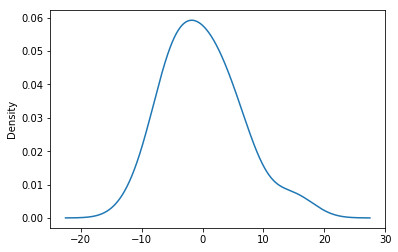

In [168]:
% matplotlib inline
data1.Residuals.plot.density()

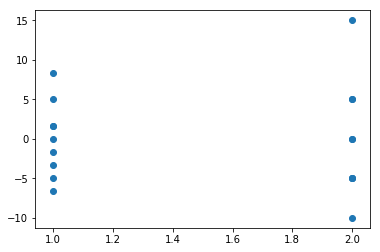

In [170]:
from matplotlib import pyplot as plt
plt.scatter(data1.Glass, data1.Residuals)

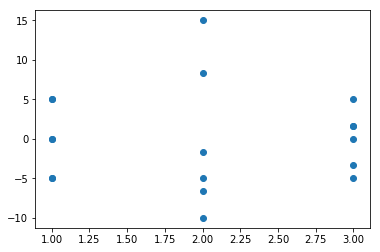

In [172]:
plt.scatter(data1.Phosphor, data1.Residuals)

The residuals look fairly resonable. There seems to be more variation for Phosphor Type 2 and Glass Type 2, however.

## 14-3 Battery Life

In [177]:
# load new data
data = pd.DataFrame({'A': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
                             3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 
                     'B': [0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 
                              0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 
                              0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2,], 
                     'Y': [130, 155, 34, 40, 20, 70, 
                              74, 180, 80, 75, 82, 58, 
                              150, 188, 136, 122, 25, 70, 
                              159, 126, 106, 115, 58, 45, 
                              138, 110, 174, 120, 96, 104, 
                              168, 160, 150, 139, 82, 60]})

In [178]:
# quick summary stats
total_sum = data['Y'].sum()
a = len(data.A.unique())
b = len(data.B.unique())
N = len(data.Y)
n = N / ( a * b )
big_mean_square = (total_sum**2) / N

In [184]:
# calculate totals
# transpose the data to iterate
flipdata = data.transpose()
# initialize totals
a1_sum = a2_sum = a3_sum = b1_sum = b2_sum = b3_sum = 0
a1_count = a2_count = a3_count = b1_count = b2_count = b3_count = 0
ab11_sum = ab12_sum = ab13_sum = ab21_sum = ab22_sum = ab23_sum = 0
ab31_sum = ab32_sum = ab33_sum = 0
for row in flipdata:
    col = flipdata[row]
    y = col['Y']
    if col['A'] == 1:
        a1_sum += y
        a1_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count += 1
            ab11_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab12_sum += y
        else:
            b3_sum += y
            b3_count += 1
            ab13_sum += y
    elif col['A'] == 2:
        a2_sum += y
        a2_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count +=1
            ab21_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab22_sum += y
        else:
            b3_sum += y
            b3_count += 1
            ab23_sum +=y
    else:
        a3_sum += y
        a3_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count +=1
            ab31_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab32_sum += y
        else:
            b3_sum += y
            b3_count += 1
            ab33_sum +=y


In [185]:
# SST all the responses squared minus big mean square
squares = data['Y']**2
SST = squares.sum() - big_mean_square

In [186]:
# SSA = sum of each group squared / bn - big_mean_square
SSA = (a1_sum ** 2 + a2_sum ** 2 + a3_sum ** 2)/(b*n) - big_mean_square

In [187]:
# SSB = sum of each group squared / bn - big_mean_square
SSB = (b1_sum ** 2 + b2_sum ** 2 + b3_sum ** 2)/(a*n) - big_mean_square

In [188]:
# SSAB = sum of each pair of treatments squared / n - big_mean_square
SSAB = (ab11_sum ** 2 + ab12_sum ** 2 + ab13_sum ** 2 + ab21_sum ** 2 + 
         ab22_sum ** 2 + ab23_sum ** 2 + ab31_sum ** 2 + 
         ab32_sum ** 2 + ab33_sum ** 2) / n - big_mean_square - SSA - SSB

In [189]:
## SSE = SST - SSA - SSB - SSAB
SSE = SST - SSA - SSB - SSAB

In [190]:
# degrees of freedom for each Sum of Squares
df_a = a - 1
df_b = b - 1
df_ab = df_a * df_b
df_error = a * b * n - 1

In [191]:
# MSA, MSB, MSAB, MSE = SS/df
MSA = SSA/df_a
MSB = SSB/df_b
MSAB = SSAB/df_ab
MSE = SSE/df_error
F_0A = MSA/MSE
F_0B = MSB/MSE
F_0AB = MSAB/MSE
print('F_0 for Material is {}'.format(F_0A.round(2)))
print('F_0 for Temperature is {}'.format(F_0B.round(2)))
print('F_0 for Interaction is {}'.format(F_0AB.round(2)))

F_0 for Material is 10.26
F_0 for Temperature is 37.55
F_0 for Interaction is 4.61


In [192]:
# P-values
A_p = stats.f.sf(F_0A, df_a, df_error)
B_p = stats.f.sf(F_0B, df_b, df_error)
AB_p = stats.f.sf(F_0AB, df_ab, df_error)
print('P-value for Material is {}'.format(A_p))
print('P-value for Temperature is {}'.format(B_p))
print('P-value for Interaction is {}'.format(AB_p))

P-value for Material is 0.000312292932919646
P-value for Temperature is 1.9490116104231757e-09
P-value for Interaction is 0.004254394966559781


Although the *p*-values for each factors are significant, there is evidence of interaction between the two factors. Reject all null hypotheses

### 14-3 (b) Graph the interaction


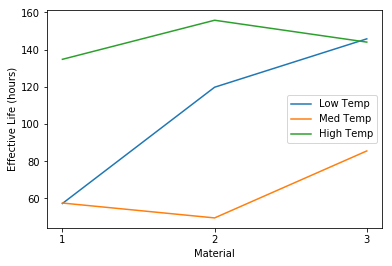

In [204]:
# plot the mean values for each cell
temp1_avgs = [ab11_sum/4, ab21_sum/4, ab31_sum/4]
temp2_avgs = [ab12_sum/4, ab22_sum/4, ab32_sum/4]
temp3_avgs = [ab13_sum/4, ab23_sum/4, ab33_sum/4]

ax = plt.subplot(111)

plt.plot([1, 2, 3], temp1_avgs, label='Low Temp')
plt.plot([1, 2, 3], temp2_avgs, label='Med Temp')
plt.plot([1, 2, 3], temp3_avgs, label='High Temp')
ax.set_xlabel('Material')
ax.set_ylabel('Effective Life (hours)')
ax.set_xticks(ticks=[1.0, 2.0, 3.0], minor=False)
plt.legend()
plt.show()

### 14-3 Analyze Residuals


In [205]:
# calcluate residuals
# start with cell means
means = [[ab11_sum / n, ab12_sum / n, ab13_sum / n], 
         [ab21_sum / n, ab22_sum / n, ab23_sum / n], 
         [ab31_sum / n, ab32_sum / n, ab33_sum / n] ]
# add column for residuals
data['Residuals'] = pd.Series(index=data.index)
# now subtract corresponding mean from each value
flipdata = data.transpose()
for row in flipdata:
    col = flipdata[row]
    i = int(col['A'] - 1)
    j = int(col['B'] )
    col['Residuals'] = col['Y'] - means[i][j]

data1 = flipdata.transpose()

In [206]:
data1

,A,B,Y,Residuals
0,1.0,0.0,130.0,72.75
1,1.0,0.0,155.0,97.75
2,1.0,1.0,34.0,-23.50
3,1.0,1.0,40.0,-17.50
4,1.0,2.0,20.0,-114.75
5,1.0,2.0,70.0,-64.75
6,1.0,0.0,74.0,16.75
7,1.0,0.0,180.0,122.75
8,1.0,1.0,80.0,22.50
9,1.0,1.0,75.0,17.50


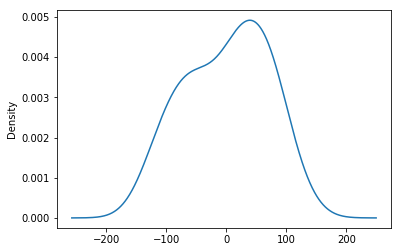

In [207]:
data1.Residuals.plot.density()

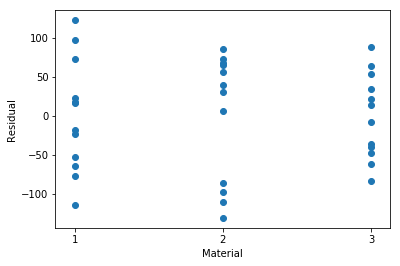

In [210]:
ax = plt.subplot(111)
ax.set_xlabel('Material')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3], minor=False)
plt.scatter(data1.A, data1.Residuals)

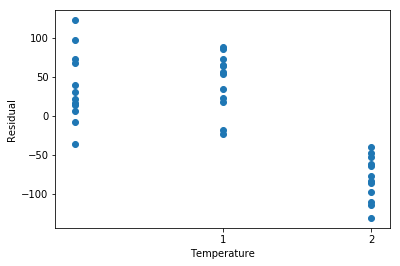

In [211]:
ax = plt.subplot(111)
ax.set_xlabel('Temperature')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3], minor=False)
plt.scatter(data1.B, data1.Residuals)

The probability density plot shows possible multi-modality and the temperature residuals show signs of abnormality.

_ _ _

### 14-5 (a) Write a model for the experiment

$Y_{ijk} = \mu+ \tau_{i} + \beta{j} + (\tau\beta)_{ij} + \epsilon_{ijk}$ for $i = 1, 2, 3$; $j = 1, 2, 3, 4$; $k = 1, 2, 3, 4, 5, 6$  

### 14-5 (b) test the hypotheses with $\alpha = 0.05$

In [228]:
# load new data
data = pd.DataFrame({'A': [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 
                           1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 
                           1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3,
                           1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 
                           1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 
                           1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3], 
                     'B': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                           1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 
                           2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                           3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
                           3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 
                           4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
                     'Y': [6.6, 4.0, 4.5, 2.2, 2.3, 0.9, 2.7, 6.2, 5.5, 2.7, 5.6, 4.9, 
                           6.0, 5.0, 4.8, 5.8, 2.2, 3.4, 3.0, 3.2, 3.0, 1.5, 1.3, 3.3, 
                           2.1, 4.1, 2.5, 2.6, 0.5, 1.1, 5.9, 2.5, 0.4, 3.5, 1.7, 0.1, 
                           5.7, 4.4, 8.9, 7.7, 2.6, 9.9, 3.2, 3.2, 7.0, 7.3, 11.5, 10.5, 
                           5.3, 9.7, 8.0, 2.2, 3.4, 6.7, 7.0, 8.9, 12.0, 9.7, 8.3, 8.0, 
                           7.3, 9.0, 8.5, 10.8, 10.4, 9.7, 8.6, 11.3, 7.9, 7.3, 10.6, 7.4]})

In [229]:
# quick summary stats
total_sum = data['Y'].sum()
a = len(data.A.unique())
b = len(data.B.unique())
N = len(data.Y)
n = N / ( a * b )
big_mean_square = (total_sum**2) / N

In [230]:
# calculate totals
# transpose the data to iterate
flipdata = data.transpose()
# initialize totals
a1_sum = a2_sum = a3_sum = b1_sum = b2_sum = b3_sum = b4_sum = 0
a1_count = a2_count = a3_count = b1_count = b2_count = b3_count = b4_count = 0
ab11_sum = ab12_sum = ab13_sum = ab14_sum = 0
ab21_sum = ab22_sum = ab23_sum = ab24_sum = 0
ab31_sum = ab32_sum = ab33_sum = ab34_sum = 0
for row in flipdata:
    col = flipdata[row]
    y = col['Y']
    if col['A'] == 1:
        a1_sum += y
        a1_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count += 1
            ab11_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab12_sum += y
        elif col['B'] == 3:
            b3_sum += y
            b3_count += 1
            ab13_sum += y
        else:
            b4_sum += y
            b4_count += 1
            ab14_sum += y
    elif col['A'] == 2:
        a2_sum += y
        a2_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count +=1
            ab21_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab22_sum += y
        elif col['B'] == 3:
            b3_sum += y
            b3_count += 1
            ab23_sum +=y
        else:
            b4_sum += y
            b4_count += 1
            ab24_sum +=y
    else:
        a3_sum += y
        a3_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count +=1
            ab31_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab32_sum += y
        elif col['B'] == 3:
            b3_sum += y
            b3_count += 1
            ab33_sum +=y
        else:
            b4_sum += y
            b4_count += 1
            ab34_sum +=y


In [237]:
# SST all the responses squared minus big mean square
squares = data['Y']**2
SST = squares.sum() - big_mean_square

# SSA = sum of each group squared / bn - big_mean_square
SSA = (a1_sum ** 2 + a2_sum ** 2 + a3_sum ** 2)/(b*n) - big_mean_square

# SSB = sum of each group squared / bn - big_mean_square
SSB = (b1_sum ** 2 + b2_sum ** 2 + 
       b3_sum ** 2 + b4_sum ** 2)/(a*n) - big_mean_square

# SSAB = sum of each pair of treatments squared / n - big_mean_square
SSAB = (ab11_sum ** 2 + ab12_sum ** 2 + ab13_sum ** 2 + ab14_sum ** 2 + 
        ab21_sum ** 2 + ab22_sum ** 2 + ab23_sum ** 2 + ab24_sum ** 2 + 
        ab31_sum ** 2 + ab32_sum ** 2 + ab33_sum ** 2 + ab34_sum ** 2) / n 
SSAB = SSAB - big_mean_square - SSA - SSB

## SSE = SST - SSA - SSB - SSAB
SSE = SST - SSA - SSB - SSAB

# degrees of freedom for each Sum of Squares
df_a = a - 1
df_b = b - 1
df_ab = df_a * df_b
df_error = a * b * n - 1

# MSA, MSB, MSAB, MSE = SS/df
MSA = SSA/df_a
MSB = SSB/df_b
MSAB = SSAB/df_ab
MSE = SSE/df_error
F_0A = MSA/MSE
F_0B = MSB/MSE
F_0AB = MSAB/MSE
print('F_0 for Temperature is {}'.format(F_0A.round(2)))
print('F_0 for Insulator is {}'.format(F_0B.round(2)))
print('F_0 for Interaction is {}'.format(F_0AB.round(2)))

# P-values
A_p = stats.f.sf(F_0A, df_a, df_error)
B_p = stats.f.sf(F_0B, df_b, df_error)
AB_p = stats.f.sf(F_0AB, df_ab, df_error)
print('P-value for Material is {}'.format(A_p))
print('P-value for Temperature is {}'.format(B_p))
print('P-value for Interaction is {}'.format(AB_p))

F_0 for Temperature is 0.38
F_0 for Insulator is 47.41
F_0 for Interaction is 2.01
P-value for Material is 0.6831681486770953
P-value for Temperature is 6.200504324851501e-17
P-value for Interaction is 0.07500102328525304


With *p*-values of 0.6, $\approx0$ and 0.075, only reject $H_{0}$ for Insulation

### 14-5 (c) Grahpically analyze


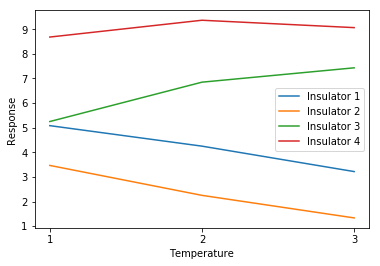

In [240]:
# plot the mean values for each cell
ins1_avgs = [ab11_sum/6, ab21_sum/6, ab31_sum/6]
ins2_avgs = [ab12_sum/6, ab22_sum/6, ab32_sum/6]
ins3_avgs = [ab13_sum/6, ab23_sum/6, ab33_sum/6]
ins4_avgs = [ab14_sum/6, ab24_sum/6, ab34_sum/6]

ax = plt.subplot(111)

plt.plot([1, 2, 3], ins1_avgs, label='Insulator 1')
plt.plot([1, 2, 3], ins2_avgs, label='Insulator 2')
plt.plot([1, 2, 3], ins3_avgs, label='Insulator 3')
plt.plot([1, 2, 3], ins4_avgs, label='Insulator 4')
ax.set_xlabel('Temperature')
ax.set_ylabel('Response')
ax.set_xticks(ticks=[1.0, 2.0, 3.0], minor=False)
plt.legend()
plt.show()

### 14-5 (d) Analyze Residuals

In [241]:
# calcluate residuals
# start with cell means
means = [[ab11_sum / n, ab12_sum / n, ab13_sum / n, ab14_sum / n], 
         [ab21_sum / n, ab22_sum / n, ab23_sum / n, ab24_sum / n], 
         [ab31_sum / n, ab32_sum / n, ab33_sum / n, ab34_sum / n] ]
# add column for residuals
data['Residuals'] = pd.Series(index=data.index)
# now subtract corresponding mean from each value
flipdata = data.transpose()
for row in flipdata:
    col = flipdata[row]
    i = int(col['A'] - 1 )
    j = int(col['B'] - 1 )
    col['Residuals'] = col['Y'] - means[i][j]

data1 = flipdata.transpose()

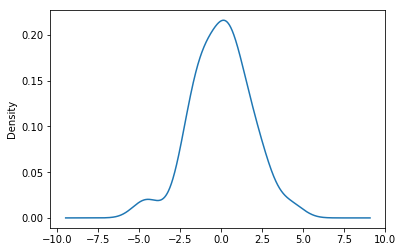

In [242]:
data1.Residuals.plot.density()

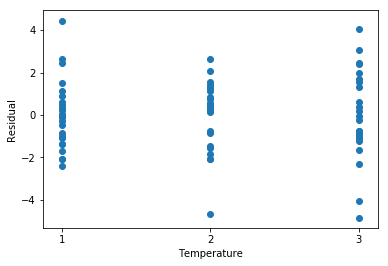

In [244]:
ax = plt.subplot(111)
ax.set_xlabel('Temperature')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3], minor=False)
plt.scatter(data1.A, data1.Residuals)

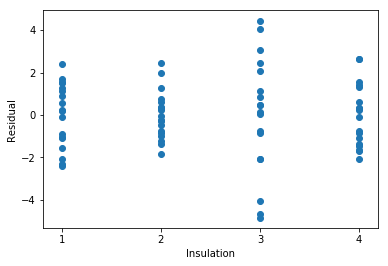

In [245]:
ax = plt.subplot(111)
ax.set_xlabel('Insulation')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3, 4], minor=False)
plt.scatter(data1.B, data1.Residuals)

The residuals look reasonable. The variance of Insulator 3 may be slightly larger.


## 14-7 Doping

In [261]:
data = pd.DataFrame({'A': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                           2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
                     'B': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 
                           1, 2, 3, 4, 5, 1, 2, 3, 4, 5,], 
                     'Y': [4.40, 8.30, 10.15, 10.29, 11.01, 
                           4.60, 8.90, 10.20, 10.30, 10.58, 
                           3.2, 7.81, 9.38, 10.19, 10.81, 
                           3.5, 7.75, 10.02, 10.10, 10.60]})

In [262]:
# quick summary stats
total_sum = data['Y'].sum()
a = len(data.A.unique())
b = len(data.B.unique())
N = len(data.Y)
n = N / ( a * b )
big_mean_square = (total_sum**2) / N

In [303]:
# calculate totals
# transpose the data to iterate
flipdata = data.transpose()
# initialize totals
a1_sum = a2_sum = b1_sum = b2_sum = 0
b3_sum = b3_count = b4_sum = b4_count = b5_sum = b5_count = 0
a1_count = a2_count = b1_count = b2_count =  0
ab11_sum = ab21_sum = 0
ab12_sum = ab22_sum = 0
ab13_sum = ab23_sum = 0
ab14_sum = ab24_sum = 0
ab15_sum = ab25_sum = 0

for row in flipdata:
    col = flipdata[row]
    y = col['Y']
    if col['A'] == 1:
        a1_sum += y
        a1_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count += 1
            ab11_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab12_sum += y
        elif col['B'] == 3:
            b3_sum += y
            b3_count += 1
            ab13_sum += y
        elif col['B'] == 4:
            b4_sum += y
            b4_count += 1
            ab14_sum += y
        elif col['B'] == 5:
            b5_sum += y
            b5_count += 1
            ab15_sum += y
    elif col['A'] == 2:
        a2_sum += y
        a2_count += 1
        if col['B'] == 1:
            b1_sum += y
            b1_count +=1
            ab21_sum += y
        elif col['B'] == 2:
            b2_sum += y
            b2_count += 1
            ab22_sum += y
        elif col['B'] == 3:
            b3_sum += y
            b3_count += 1
            ab23_sum +=y
        elif col['B'] == 4:
            b4_sum += y
            b4_count += 1
            ab24_sum +=y
        elif col['B'] == 5:
            b5_sum += y
            b5_count += 1
            ab25_sum +=y
            

In [304]:
# SST all the responses squared minus big mean square
squares = data['Y']**2
SST = squares.sum() - big_mean_square

# SSA = sum of each group squared / bn - big_mean_square
SSA = (a1_sum ** 2 + a2_sum ** 2 )/(b*n) - big_mean_square

# SSB = sum of each group squared / bn - big_mean_square
SSB = (b1_sum ** 2 + b2_sum ** 2 + b3_sum ** 2 + b4_sum ** 2 + b5_sum ** 2)/(a*n) - big_mean_square

# SSAB = sum of each pair of treatments squared / n - big_mean_square
SSAB = (ab11_sum ** 2 + ab12_sum ** 2 + ab13_sum ** 2 + ab14_sum ** 2 + 
        ab15_sum ** 2 + ab21_sum ** 2 + ab22_sum ** 2 + ab23_sum ** 2 + 
        ab24_sum ** 2 + ab25_sum ** 2 ) / n 
SSAB = SSAB - big_mean_square - SSA - SSB

## SSE = SST - SSA - SSB - SSAB
SSE = SST - SSA - SSB - SSAB

# degrees of freedom for each Sum of Squares
df_a = a - 1
df_b = b - 1
df_ab = df_a * df_b
df_error = a * b * n - 1

# MSA, MSB, MSAB, MSE = SS/df
MSA = SSA/df_a
MSB = SSB/df_b
MSAB = SSAB/df_ab
MSE = SSE/df_error
F_0A = MSA/MSE
F_0B = MSB/MSE
F_0AB = MSAB/MSE
print('F_0 for Doping Level is {}'.format(F_0A.round(2)))
print('F_0 for Annealing Conditions is {}'.format(F_0B.round(2)))
print('F_0 for Interaction is {}'.format(F_0AB.round(2)))

# P-values
A_p = stats.f.sf(F_0A, df_a, df_error)
B_p = stats.f.sf(F_0B, df_b, df_error)
AB_p = stats.f.sf(F_0AB, df_ab, df_error)
print('P-value for Doping Level is {}'.format(A_p))
print('P-value for Annealing Conditions is {}'.format(B_p))
print('P-value for Interaction is {}'.format(AB_p))

F_0 for Doping Level is 47.94
F_0 for Annealing Conditions is 1032.69
F_0 for Interaction is 6.73
P-value for Doping Level is 1.335502012284608e-06
P-value for Annealing Conditions is 6.256594832348462e-22
P-value for Interaction is 0.0015055853982941872


Reject $H_{0}$ for main effects and interaction.

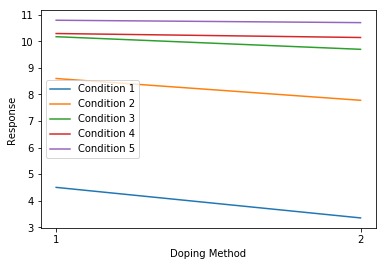

In [285]:
# plot the mean values for each cell
ann1_avgs = [ab11_sum/2, ab21_sum/2]
ann2_avgs = [ab12_sum/2, ab22_sum/2]
ann3_avgs = [ab13_sum/2, ab23_sum/2]
ann4_avgs = [ab14_sum/2, ab24_sum/2]
ann5_avgs = [ab15_sum/2, ab25_sum/2]

ax = plt.subplot(111)

plt.plot([1, 2], ann1_avgs, label='Condition 1')
plt.plot([1, 2], ann2_avgs, label='Condition 2')
plt.plot([1, 2], ann3_avgs, label='Condition 3')
plt.plot([1, 2], ann4_avgs, label='Condition 4')
plt.plot([1, 2], ann5_avgs, label='Condition 5')
ax.set_xlabel('Doping Method')
ax.set_ylabel('Response')
ax.set_xticks(ticks=[1.0, 2.0], minor=False)
plt.legend()
plt.show()

In [306]:
# calcluate residuals
# start with cell means
means = [[ab11_sum / n, ab12_sum / n, ab13_sum / n, ab14_sum / n, ab15_sum / n], 
         [ab21_sum / n, ab22_sum / n, ab23_sum / n, ab24_sum / n, ab25_sum / n]]
# add column for residuals
data['Residuals'] = pd.Series(index=data.index)
# now subtract corresponding mean from each value
flipdata = data.transpose()
for row in flipdata:
    col = flipdata[row]
    i = int(col['A'] - 1 )
    j = int(col['B'] - 1 )
    col['Residuals'] = col['Y'] - means[i][j]

data1 = flipdata.transpose()

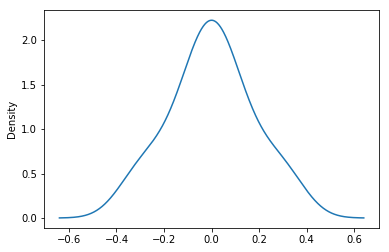

In [307]:
data1.Residuals.plot.density()

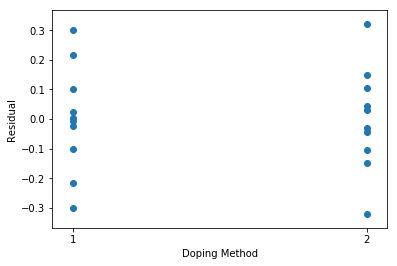

In [308]:
ax = plt.subplot(111)
ax.set_xlabel('Doping Method')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2], minor=False)
plt.scatter(data1.A, data1.Residuals)

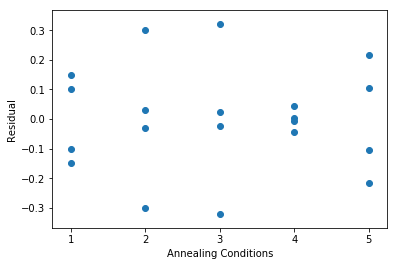

In [309]:
ax = plt.subplot(111)
ax.set_xlabel('Annealing Conditions')
ax.set_ylabel('Residual')
ax.set_xticks([1, 2, 3, 4, 5], minor=False)
plt.scatter(data1.B, data1.Residuals)

The residuals look reasonable, with the exception of the small variance in condition 4.